Raul Jimenez - 19017
# Hoja de trabajo Análisis de Malware

## Parte 1 - Analisis estadistico

1. Utilice la herramienta pefile para examinar el PE header y obtenga las DLL y las APIs que cada 
uno  de  los  ejecutables  utilizan.  ¿Qué  diferencias  observa  entre  los  ejemplos?  ¿Existe  algún 
indicio sospechoso en la cantidad de DLLs y las APIs llamadas?

**R/ La mayor diferencia que se puede observar es que el segundo archivo llama a varias apis del kernel32 en comparacion del primero. En el primero podemos ver que hace una llamada al SHChangeNotify lo cual siento que es algo raro y de igual forma el segundo hace varias llamadas a varias apis del kernel lo cual tambien parece algo sospechoso. De igual forma el primer archivo se puede observar que sube librerias al kernel y de igual forma al user32. Lo que parece mas sospechoso es que el archivo numero 2 abre y cierra varios archivos del SVCRT**

In [33]:
import pefile

pe_qwrty = pefile.PE('./MALWR/sample_qwrty_dk2')
pe_vg655 = pefile.PE('./MALWR/sample_vg655_25th.exe')

print('========= SAMPLE_QWRTY_DK2 =========')
print('LLAMADAS AL DLL')
for entry in pe_qwrty.DIRECTORY_ENTRY_IMPORT:
    print(entry.dll)
    print('LLAMADAS A FUNCIONES \t')
    for function in entry.imports:
        print ('\t', function.name)

print('========= SAMPLE_VG655_25TH.EXE ==========')
print('LLAMADAS AL DLL')
vg655_calls = []
for entry in pe_vg655.DIRECTORY_ENTRY_IMPORT:
    print(entry.dll)
    print('LLAMADAS A FUNCIONES \t')
    for function in entry.imports:
        print ('\t', function.name)
        vg655_calls.append(function.name.decode())

========= SAMPLE_QWRTY_DK2 =========
LLAMADAS AL DLL
b'KERNEL32.DLL'
LLAMADAS A FUNCIONES 	
	 b'CloseHandle'
	 b'WaitForSingleObject'
	 b'CreateEventA'
	 b'ExitThread'
	 b'Sleep'
	 b'GetComputerNameA'
	 b'CreatePipe'
	 b'DisconnectNamedPipe'
	 b'TerminateProcess'
	 b'WaitForMultipleObjects'
	 b'TerminateThread'
	 b'CreateThread'
	 b'CreateProcessA'
	 b'DuplicateHandle'
	 b'GetCurrentProcess'
	 b'ReadFile'
	 b'PeekNamedPipe'
	 b'SetEvent'
	 b'WriteFile'
	 b'SetProcessPriorityBoost'
	 b'SetThreadPriority'
	 b'GetCurrentThread'
	 b'SetPriorityClass'
	 b'lstrcatA'
	 b'lstrcpyA'
	 b'GetEnvironmentVariableA'
	 b'GetShortPathNameA'
	 b'GetModuleFileNameA'
	 b'GetStartupInfoA'
	 b'GetModuleHandleA'
b'MSVCRT.dll'
LLAMADAS A FUNCIONES 	
	 b'_controlfp'
	 b'_beginthread'
	 b'_strnicmp'
	 b'sprintf'
	 b'atol'
	 b'strchr'
	 b'free'
	 b'malloc'
	 b'_exit'
	 b'_XcptFilter'
	 b'exit'
	 b'_acmdln'
	 b'__getmainargs'
	 b'_initterm'
	 b'__setusermatherr'
	 b'_adjust_fdiv'
	 b'__p__commode'
	 b'__p__fmode

2. Obtenga la información de las secciones del PE Header. ¿Qué significa que algunas secciones 
tengan como parte de su nombre “upx”? Realice el procedimiento de desempaquetado para 
obtener las llamadas completas de las APIs. 

**R/ Que tenga upx en algunas ecciones quiere decir que el progrmmama esta empaquetado. Para eso se va a desempaquetar solo el primero debido a que solo ese tiene upx en los headers, eso quiere decri que el segundo archivo no esta empaquetado. Ya descomprimido el primer archivo podemos observar que utiliza varias funciones del kernel32 y del MSVCRT**

In [34]:
print('SECTIONS PE_QWRTY')
for section in pe_qwrty.sections:
    print(section.Name, hex(section.VirtualAddress), hex(section.Misc_VirtualSize), section.SizeOfRawData)

print('SECTION PE_vg655')
for section in pe_vg655.sections:
    print(section.Name, hex(section.VirtualAddress), hex(section.Misc_VirtualSize), section.SizeOfRawData)


SECTIONS PE_QWRTY
b'.text\x00\x00\x00' 0x1000 0xea6 4096
b'.rdata\x00\x00' 0x2000 0x67e 2048
b'.data\x00\x00\x00' 0x3000 0x628 512
b'.rsrc\x00\x00\x00' 0x4000 0x80 512
SECTION PE_vg655
b'.text\x00\x00\x00' 0x1000 0x69b0 28672
b'.rdata\x00\x00' 0x8000 0x5f70 24576
b'.data\x00\x00\x00' 0xe000 0x1958 8192
b'.rsrc\x00\x00\x00' 0x10000 0x349fa0 3448832


In [35]:
pe_qwrty_des = pefile.PE('./MALWR/sample_qwrty_dk2')
print('SECTIONS PE_QWRTY')
for section in pe_qwrty_des.sections:
    print(section.Name, hex(section.VirtualAddress), hex(section.Misc_VirtualSize), section.SizeOfRawData)

qwrty_calls = []
print('========= SAMPLE_QWRTY_DK2 DESCOMPRIMIDO =========')
print('LLAMADAS AL DLL')
for entry in pe_qwrty_des.DIRECTORY_ENTRY_IMPORT:
    print(entry.dll)
    print('LLAMADAS A FUNCIONES \t')
    for function in entry.imports:
        print ('\t', function.name)
        qwrty_calls.append(function.name.decode())

SECTIONS PE_QWRTY
b'.text\x00\x00\x00' 0x1000 0xea6 4096
b'.rdata\x00\x00' 0x2000 0x67e 2048
b'.data\x00\x00\x00' 0x3000 0x628 512
b'.rsrc\x00\x00\x00' 0x4000 0x80 512
========= SAMPLE_QWRTY_DK2 DESCOMPRIMIDO =========
LLAMADAS AL DLL
b'KERNEL32.DLL'
LLAMADAS A FUNCIONES 	
	 b'CloseHandle'
	 b'WaitForSingleObject'
	 b'CreateEventA'
	 b'ExitThread'
	 b'Sleep'
	 b'GetComputerNameA'
	 b'CreatePipe'
	 b'DisconnectNamedPipe'
	 b'TerminateProcess'
	 b'WaitForMultipleObjects'
	 b'TerminateThread'
	 b'CreateThread'
	 b'CreateProcessA'
	 b'DuplicateHandle'
	 b'GetCurrentProcess'
	 b'ReadFile'
	 b'PeekNamedPipe'
	 b'SetEvent'
	 b'WriteFile'
	 b'SetProcessPriorityBoost'
	 b'SetThreadPriority'
	 b'GetCurrentThread'
	 b'SetPriorityClass'
	 b'lstrcatA'
	 b'lstrcpyA'
	 b'GetEnvironmentVariableA'
	 b'GetShortPathNameA'
	 b'GetModuleFileNameA'
	 b'GetStartupInfoA'
	 b'GetModuleHandleA'
b'MSVCRT.dll'
LLAMADAS A FUNCIONES 	
	 b'_controlfp'
	 b'_beginthread'
	 b'_strnicmp'
	 b'sprintf'
	 b'atol'
	 b'strch

3. Según el paper “Towards Understanding Malware Behaviour by the Extraction of API Calls”, 
¿en  que  categoría  sospechosas  pueden  clasificarse  estos  ejemplos  en  base  a  algunas  de  las 
llamadas a las APIs que realizan? Muestre una tabla con las APIs sospechosas y la categoría de 
malware que el paper propone. 

In [36]:
malware_categories = [
    ['FindClose', 'FindFirstFile', 'FindFirstFileEx', 'FindFirstFileName', 'TransactedW', 
'FindFirstFileNameW', 'FindFirstFileTransacted', 'FindFirstStream', 'TransactedW', 
'FindFirstStreamW', 'FindNextFile', 'FindNextFileNameW', 'FindNextStreamW', 'SearchPath'],
['CloseHandle', 'CopyFile', 'CopyFileEx', 'CopyFileTransacted', 'CreateFile', 
'CreateFileTransacted', 'CreateHardLink', 'CreateHardLink', 'Transacted', 
'CreateSymbolicLink', 'CreateSymbolic', 'LinkTransacted', 'DeleteFile', 
'DeleteFileTransacted'],
['GetBinaryType', 'GetCompressed', 'FileSize', 'GetCompressedFile', 'SizeTransacted', 
'GetFileAttributes', 'GetFileAttributesEx', 'GetFileAttributes', 'Transacted', 
'GetFileBandwidth', 'Reservation', 'GetFileInformation', 'ByHandle', 'GetFileInformation', 
'ByHandleEx', 'GetFileSize', 'GetFileSizeEx', 'GetFileType', 'GetFinalPathName', 'ByHandle', 
'GetFullPathName', 'GetFullPathName', 'Transacted', 'GetLongPathName', 
'GetLongPathName', 'Transacted', 'GetShortPathName', 'GetTempFileName', 'GetTempPath'],
['MoveFile', 'MoveFileEx', 'MoveFileTransacted', 'MoveFileWithProgress'],
['OpenFile', 'OpenFileById', 'ReOpenFile', 'ReplaceFile', 'WriteFile', 'CreateFile', 'CloseHandle'],
['SetFileApisToANSI', 'SetFileApisToOEM', 'SetFileAttributes', 
'SetFileAttributesTransacted', 'SetFileBandwidthReservation', 
'SetFileInformationByHandle', 'SetFileShortName', 'SetFileValidData']
]

In [37]:
import pandas as pd
qwrty_table = pd.DataFrame()
qwrty_table['API_Sospechosa']=None
qwrty_table['Categoria_de_malware']=None

vg655_table = pd.DataFrame()
vg655_table['API_Sospechosa']=None
vg655_table['Categoria_de_malware']=None

In [38]:
def get_malware_category(index):
    if index == 0:
        return 'Search for Files to Infect'
    elif index == 1:
        return 'Copy/Delete Files'
    elif index == 2:
        return 'Get File Information'
    elif index == 3:
        return 'Move Files'
    elif index == 4:
        return 'Read/Write Files'
    else:
        return 'Change File Attributes'

In [39]:
# QWRTY
for call in qwrty_calls:
    for category in malware_categories:
        if call in category or call[:-1] in category:
            malware_cat = get_malware_category(malware_categories.index(category))
            qwrty_table = qwrty_table.append({'API_Sospechosa': call, 'Categoria_de_malware': malware_cat}, ignore_index=True)

# VG655
for call in vg655_calls:
    for category in malware_categories:
        if call in category or call[:-1] in category:
            malware_cat = get_malware_category(malware_categories.index(category))
            vg655_table = vg655_table.append({'API_Sospechosa': call, 'Categoria_de_malware': malware_cat}, ignore_index=True)

In [40]:
qwrty_table

,API_Sospechosa,Categoria_de_malware
0,CloseHandle,Copy/Delete Files
1,CloseHandle,Read/Write Files
2,WriteFile,Read/Write Files
3,GetShortPathNameA,Get File Information


In [41]:
vg655_table

,API_Sospechosa,Categoria_de_malware
0,GetFileAttributesW,Get File Information
1,GetFileSizeEx,Get File Information
2,CreateFileA,Copy/Delete Files
3,CreateFileA,Read/Write Files
4,GetFileSize,Get File Information
5,WriteFile,Read/Write Files
6,SetFileAttributesW,Change File Attributes
7,GetTempPathW,Get File Information
8,GetFileAttributesA,Get File Information
9,GetFullPathNameA,Get File Information


4. Para el archivo “sample_vg655_25th.exe” obtenga el HASH en base al algoritmo SHA256. 

In [42]:
print('======== HASH SAMPLE_VG655 =========')
import hashlib
 
filename = './MALWR/sample_vg655_25th.exe'
sha256_hash = hashlib.sha256()
with open(filename,"rb") as f:
    # Read and update hash string value in blocks of 4K
    for byte_block in iter(lambda: f.read(4096),b""):
        sha256_hash.update(byte_block)
    print(sha256_hash.hexdigest())
    sha_vg655 = sha256_hash.hexdigest()

======== HASH SAMPLE_VG655 =========
ed01ebfbc9eb5bbea545af4d01bf5f1071661840480439c6e5babe8e080e41aa


5. Para el archivo “sample_vg655_25th.exe”, ¿cuál es el propósito de la DLL ADVAPI32.dll? 

**R/La ADVAPI32 lo que hace es dar acceso a funciones api de windows mas avanzadas relacionadas con el registro de windows.**

6. Para  el  archivo  “sample_vg655_25th.exe”,  ¿cuál  es  el  propósito  de  la  API 
CryptReleaseContext? 

**R/ La funcion cryptreleasecontext lo que hace es liberar los espacios usados con el contexto de criptografia, lo que quiere decir que libera la memoria una vez ya se encriptaron los datos requeridos.**

7. Con  la  información  recopilada  hasta  el  momento,  indique  para  el  archivo 
““sample_vg655_25th.exe” si es sospechoso o no, y cual podría ser su propósito.

**R/ Por lo que hemos visto si es sospechoso. Podemos deducir que el proposito de este es encriptar archivos de la maquina que lo abre, RANSOMEWARE**

## Part 2 - Analisis dinamico

8. Utilice la plataforma de análisis dinámico https://www.hybrid-analysis.com y cargue el archivo 
“sample_vg655_25th.exe”. ¿Se corresponde el HASH de la plataforma con el generado? ¿Cuál 
es el nombre del malware encontrado? ¿Cuál es el propósito de este malware? 

SHA256 page: ed01ebfbc9eb5bbea545af4d01bf5f1071661840480439c6e5babe8e080e41aa

R/ Como se puede ver ambos hash son iguales y el nombre del archivo es **owo_im_not_ransomware_xd.exe** y viendo los labes de la pagina podemos ver que el proposito del malware es un ransomware, robar inforamcion y encriptarla. Trojano, ransom wannacryptor.

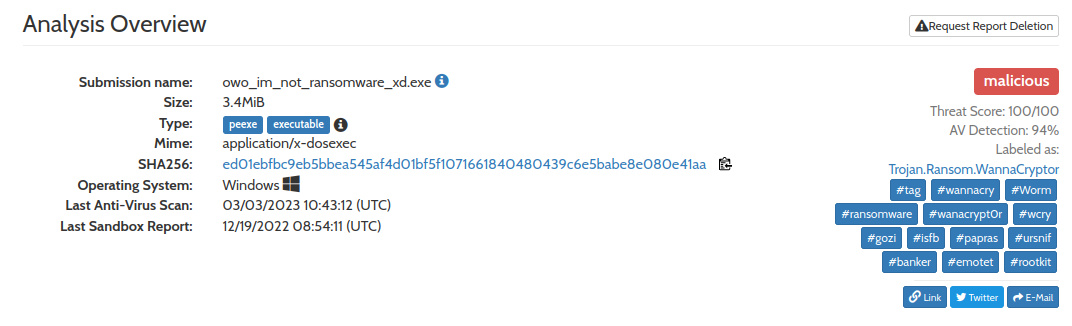

In [43]:
web_sha = 'ed01ebfbc9eb5bbea545af4d01bf5f1071661840480439c6e5babe8e080e41aa'
if web_sha == sha_vg655: print('TIENEN EL MISMO HASH')

TIENEN EL MISMO HASH


9. Muestre  las  capturas  de  pantalla  sobre  los  mensajes  que  este  malware  presenta  a  usuario. 
¿Se corresponden las sospechas con el análisis realizado en el punto 7?

**R/ Si se confirman las sospechas del punto 7. Este sofware lo que hace es encriptar archivos y solicitar un pago para que se puedan desencriptar.**

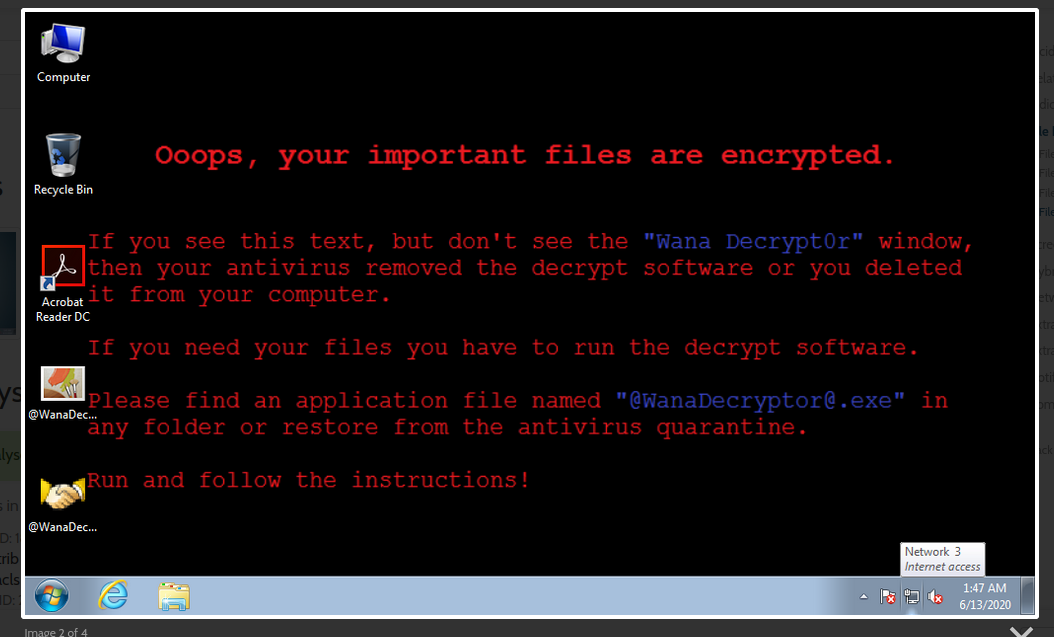

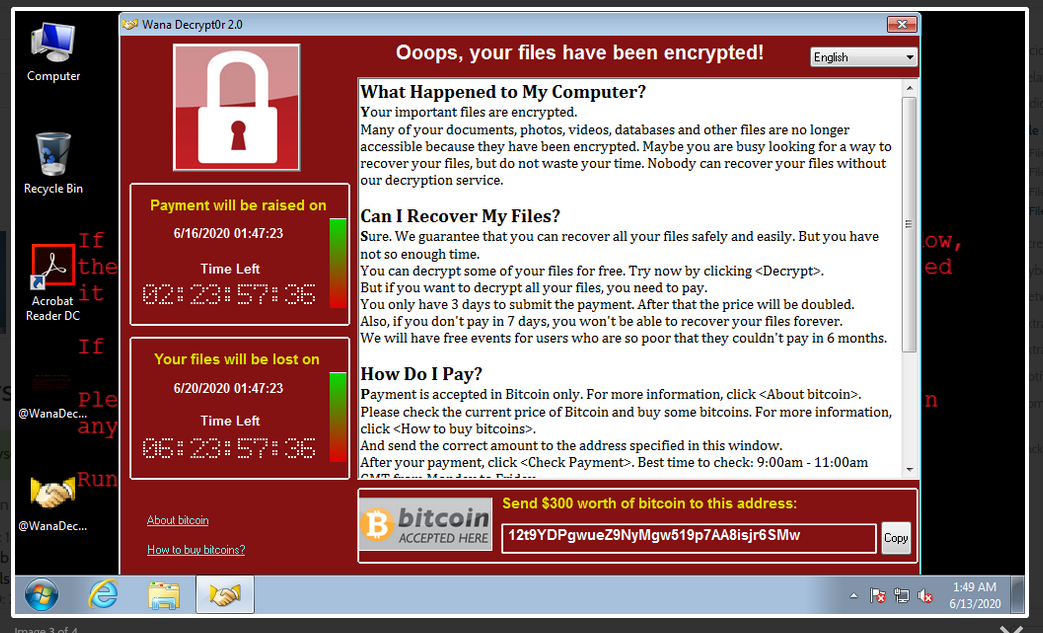